Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7100 - loss: 0.5416 - val_accuracy: 0.8630 - val_loss: 0.3188
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8960 - loss: 0.2665 - val_accuracy: 0.8622 - val_loss: 0.3184
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9315 - loss: 0.1846 - val_accuracy: 0.8262 - val_loss: 0.3834
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9500 - loss: 0.1439 - val_accuracy: 0.8548 - val_loss: 0.4238
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9668 - loss: 0.0991 - val_accuracy: 0.8542 - val_loss: 0.4611
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8455 - loss: 0.4806
LSTM Test accuracy: 84.92
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6772 - loss: 0.5704 - val_accuracy: 0.8618 - val_loss: 0.3307
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8992 - loss: 0.2494 - val_accuracy: 0.8748 - val_loss: 0.3277
Epo

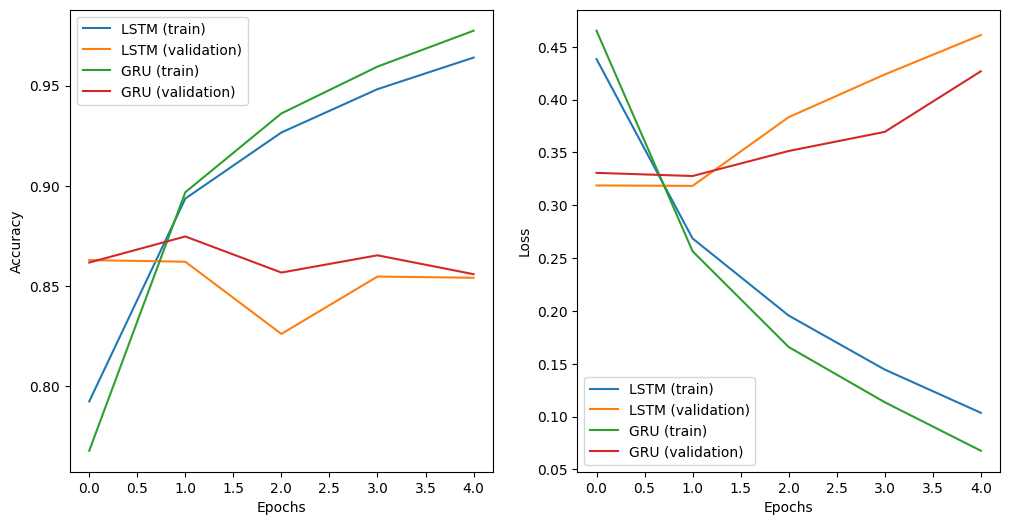

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU
import matplotlib.pyplot as plt

# ----------------------------- Hyperparameters -----------------------------
num_words = 10000
max_length = 200

# ----------------------------- Load & Preprocess Data -----------------------------
(xtr, ytr), (xte, yte) = imdb.load_data(num_words=num_words)
xtr, xte = pad_sequences(xtr, maxlen=max_length), pad_sequences(xte, maxlen=max_length)

# ----------------------------- LSTM Model -----------------------------
l_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

l_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
l_history = l_model.fit(xtr, ytr, validation_split=0.2, epochs=5, batch_size=64)
loss, acc = l_model.evaluate(xte, yte)
print("LSTM Test accuracy:", round(acc*100, 4))

# ----------------------------- GRU Model -----------------------------
g_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=max_length),
    GRU(128),
    Dense(1, activation='sigmoid')
])

g_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
g_history = g_model.fit(xtr, ytr, validation_split=0.2, epochs=5, batch_size=64)
loss, acc = g_model.evaluate(xte, yte)
print("GRU Test accuracy:", round(acc*100, 4))

# ----------------------------- Plot Accuracy & Loss -----------------------------
plt.figure(figsize=(12,6))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(l_history.history['accuracy'], label='LSTM (train)')
plt.plot(l_history.history['val_accuracy'], label='LSTM (validation)')
plt.plot(g_history.history['accuracy'], label='GRU (train)')
plt.plot(g_history.history['val_accuracy'], label='GRU (validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(l_history.history['loss'], label='LSTM (train)')
plt.plot(l_history.history['val_loss'], label='LSTM (validation)')
plt.plot(g_history.history['loss'], label='GRU (train)')
plt.plot(g_history.history['val_loss'], label='GRU (validation)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
